<a href="https://colab.research.google.com/github/zmarkofsky/DataDriven_Predicting_H1N1/blob/main/DataDriven_H1N1_Vaccine_Project_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Updates and Imports

In [ ]:
#updates to sklearn are required due to usage of newer libray features

!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

#Exploratory Data Analysis

Data for this project is provided by DrivenData through the NHS

Information on the details of this project can be found here: https://www.drivendata.org/competitions/66/flu-shot-learning/page/213/

This is a 35 feature dataset with will be used to predict on two labels each with two classes.

The data is pre-split into a training and testing set, both encompasing approximately half the dataset.

53,415 records in total

In [ ]:
X_train_url = 'https://raw.githubusercontent.com/zmarkofsky/DataDriven_Predicting_H1N1/main/training_set_features.csv'
X_test_url = 'https://raw.githubusercontent.com/zmarkofsky/DataDriven_Predicting_H1N1/main/test_set_features.csv'
Y_train_url = 'https://raw.githubusercontent.com/zmarkofsky/DataDriven_Predicting_H1N1/main/training_set_labels.csv'

X_train = pd.read_csv(X_train_url, index_col='respondent_id')
X_test = pd.read_csv(X_test_url, index_col='respondent_id')
Y_train = pd.read_csv(Y_train_url, index_col='respondent_id')

print(X_train.shape, X_test.shape, Y_train.shape)
X_train.head()
X_test.head()
Y_train.head()

(26707, 35) (26708, 35) (26707, 2)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
X_train.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [ ]:
#print unique outputs for all columns

for col_name, col_data in X_train.iteritems():
     print(col_name)
     print(col_data.unique())

h1n1_concern
[ 1.  3.  2.  0. nan]
h1n1_knowledge
[ 0.  2.  1. nan]
behavioral_antiviral_meds
[ 0.  1. nan]
behavioral_avoidance
[ 0.  1. nan]
behavioral_face_mask
[ 0.  1. nan]
behavioral_wash_hands
[ 0.  1. nan]
behavioral_large_gatherings
[ 0.  1. nan]
behavioral_outside_home
[ 1.  0. nan]
behavioral_touch_face
[ 1.  0. nan]
doctor_recc_h1n1
[ 0. nan  1.]
doctor_recc_seasonal
[ 0. nan  1.]
chronic_med_condition
[ 0.  1. nan]
child_under_6_months
[ 0.  1. nan]
health_worker
[ 0.  1. nan]
health_insurance
[ 1. nan  0.]
opinion_h1n1_vacc_effective
[ 3.  5.  4.  2.  1. nan]
opinion_h1n1_risk
[ 1.  4.  3.  2.  5. nan]
opinion_h1n1_sick_from_vacc
[ 2.  4.  1.  5.  3. nan]
opinion_seas_vacc_effective
[ 2.  4.  5.  3.  1. nan]
opinion_seas_risk
[ 1.  2.  4.  3.  5. nan]
opinion_seas_sick_from_vacc
[ 2.  4.  1.  5. nan  3.]
age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race
['

In [ ]:
descriptive = X_train.describe()
descriptive_transposed = descriptive.T 
descriptive_transposed

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


###Explore correlations

In [ ]:
X_Y_train = X_train.join(Y_train)
X_Y_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


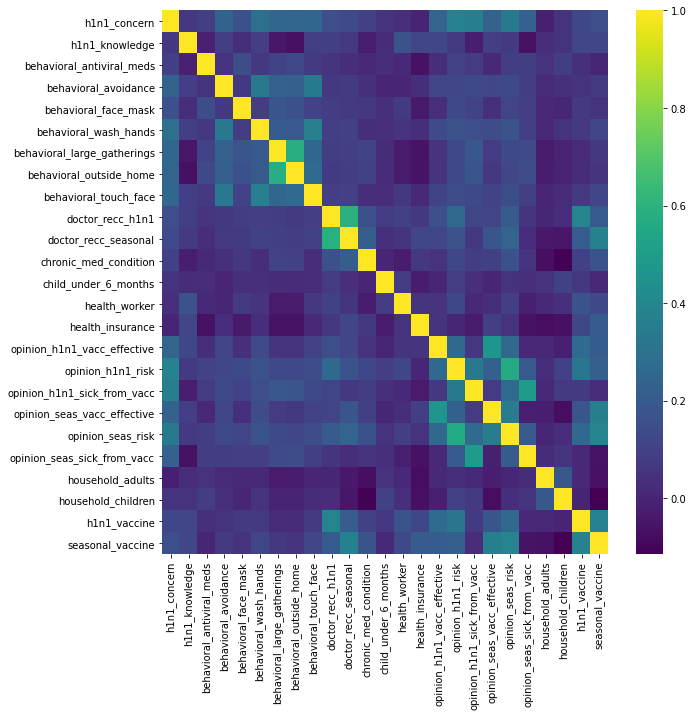

In [ ]:
corrMatrix = X_Y_train.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_Y_train.corr(), cmap='viridis')

In [ ]:
vax_corr = corrMatrix.loc[:,['h1n1_vaccine', 'seasonal_vaccine']]    #keep target columns only
vax_corr = vax_corr.iloc[:-2,:] #drop bottom 2 rows with correlation of vaccines to itself
vax_corr

,h1n1_vaccine,seasonal_vaccine
h1n1_concern,0.121929,0.154828
h1n1_knowledge,0.117951,0.120152
behavioral_antiviral_meds,0.040608,0.006277
behavioral_avoidance,0.047690,0.076395
behavioral_face_mask,0.070498,0.050083
behavioral_wash_hands,0.074712,0.112414
behavioral_large_gatherings,0.017822,0.064025
behavioral_outside_home,0.021768,0.053509
behavioral_touch_face,0.071648,0.120228
doctor_recc_h1n1,0.393890,0.198607


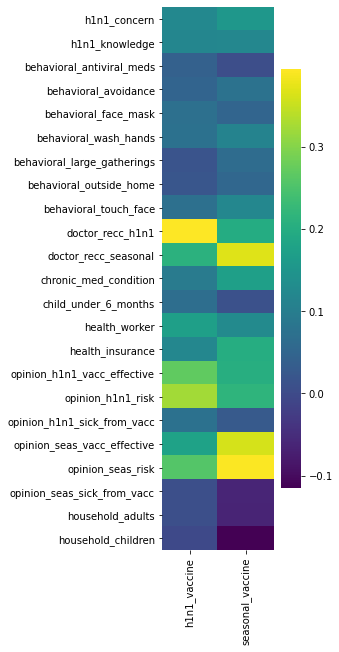

In [ ]:
fig, ax = plt.subplots(figsize=(2.5,10))
sns.heatmap(vax_corr, cmap='viridis')

**Overall, some low correlations between features does exist (Pearson coefficient of ~0.6). These values were considered boarderline, if higher correlations existed, then removal of correlated features may be necessary, but this was not the case in this problem. Furthermore, given that only 35 features were present in the dataset, this number did not necessitate feature removal.**

###Exploration of nulls

<Figure size 720x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'h1n1_concern'),
 Text(0, 0, 'h1n1_knowledge'),
 Text(0, 0, 'behavioral_antiviral_meds'),
 Text(0, 0, 'behavioral_avoidance'),
 Text(0, 0, 'behavioral_face_mask'),
 Text(0, 0, 'behavioral_wash_hands'),
 Text(0, 0, 'behavioral_large_gatherings'),
 Text(0, 0, 'behavioral_outside_home'),
 Text(0, 0, 'behavioral_touch_face'),
 Text(0, 0, 'doctor_recc_h1n1'),
 Text(0, 0, 'doctor_recc_seasonal'),
 Text(0, 0, 'chronic_med_condition'),
 Text(0, 0, 'child_under_6_months'),
 Text(0, 0, 'health_worker'),
 Text(0, 0, 'health_insurance'),
 Text(0, 0, 'opinion_h1n1_vacc_effective'),
 Text(0, 0, 'opinion_h1n1_risk'),
 Text(0, 0, 'opinion_h1n1_sick_from_vacc'),
 Text(0, 0, 'opinion_seas_vacc_effective'),
 Text(0, 0, 'opinion_seas_risk'),
 Text(0, 0, 'opinion_seas_sick_from_vacc'),
 Text(0, 0, 'age_group'),
 Text(0, 0, 'education'),
 Text(0, 0, 'race'),
 Text(0, 0, 'sex'),
 Text(0, 0, 'income_poverty'),
 Text(0, 0, 'marital_status'),
 Text(0, 0, 'rent_or_own'),
 Text(0, 0, 'employment_statu

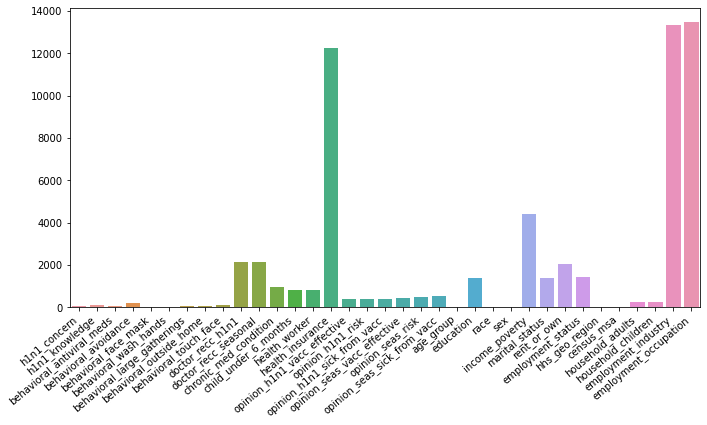

In [ ]:
#Graph the number of nulls for each feature

X_train_null_count = X_train.apply(lambda x: x.isnull().value_counts()).T[True]

plt.figure(figsize=(10,6))
ax = sns.barplot(X_train_null_count.index, X_train_null_count.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#calculate the %nulls for each feature

for i in range(len(X_train.isna().sum())):
  n_miss= X_train.isna().sum()[i]
  perc = n_miss/X_train.shape[0]*100
  print('> %s, Missing: %d (%.1f%%)' % (X_train.columns[i], n_miss, perc))

> h1n1_concern, Missing: 92 (0.3%)
> h1n1_knowledge, Missing: 116 (0.4%)
> behavioral_antiviral_meds, Missing: 71 (0.3%)
> behavioral_avoidance, Missing: 208 (0.8%)
> behavioral_face_mask, Missing: 19 (0.1%)
> behavioral_wash_hands, Missing: 42 (0.2%)
> behavioral_large_gatherings, Missing: 87 (0.3%)
> behavioral_outside_home, Missing: 82 (0.3%)
> behavioral_touch_face, Missing: 128 (0.5%)
> doctor_recc_h1n1, Missing: 2160 (8.1%)
> doctor_recc_seasonal, Missing: 2160 (8.1%)
> chronic_med_condition, Missing: 971 (3.6%)
> child_under_6_months, Missing: 820 (3.1%)
> health_worker, Missing: 804 (3.0%)
> health_insurance, Missing: 12274 (46.0%)
> opinion_h1n1_vacc_effective, Missing: 391 (1.5%)
> opinion_h1n1_risk, Missing: 388 (1.5%)
> opinion_h1n1_sick_from_vacc, Missing: 395 (1.5%)
> opinion_seas_vacc_effective, Missing: 462 (1.7%)
> opinion_seas_risk, Missing: 514 (1.9%)
> opinion_seas_sick_from_vacc, Missing: 537 (2.0%)
> age_group, Missing: 0 (0.0%)
> education, Missing: 1407 (5.3%)
>

In [ ]:
X_Y_train_null = X_train.isna().join(Y_train)
X_Y_train_null.groupby(['h1n1_vaccine']).mean().transpose()
X_Y_train_null.groupby(['seasonal_vaccine']).mean().transpose()

h1n1_vaccine,0,1
h1n1_concern,0.003613,0.002820
h1n1_knowledge,0.004469,0.003877
behavioral_antiviral_meds,0.001997,0.005111
behavioral_avoidance,0.008320,0.005816
behavioral_face_mask,0.000618,0.001057
behavioral_wash_hands,0.001664,0.001234
behavioral_large_gatherings,0.003471,0.002467
behavioral_outside_home,0.003328,0.002115
behavioral_touch_face,0.005230,0.003172
doctor_recc_h1n1,0.093900,0.032605


seasonal_vaccine,0,1
h1n1_concern,0.003503,0.003378
h1n1_knowledge,0.004204,0.004503
behavioral_antiviral_meds,0.001612,0.003860
behavioral_avoidance,0.007567,0.008042
behavioral_face_mask,0.000561,0.000885
behavioral_wash_hands,0.001682,0.001448
behavioral_large_gatherings,0.003083,0.003458
behavioral_outside_home,0.002943,0.003217
behavioral_touch_face,0.004624,0.004986
doctor_recc_h1n1,0.098024,0.061198


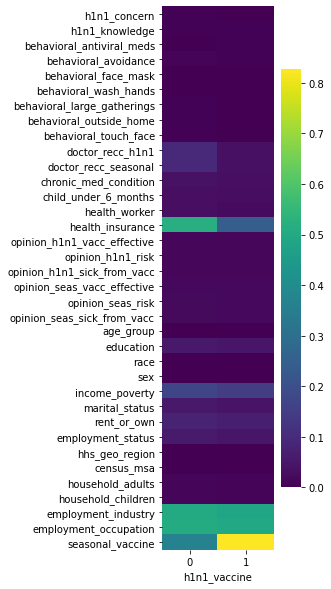

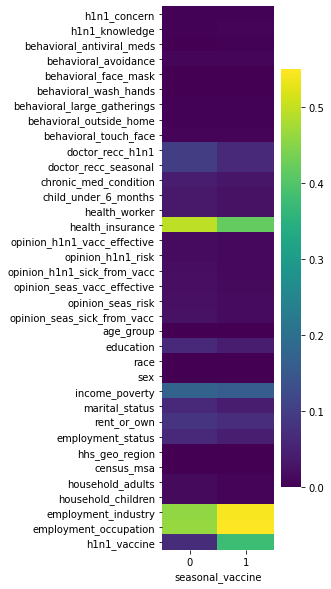

In [ ]:
#show the %nulls as a heat map

fig, ax = plt.subplots(figsize=(2.5,10))
sns.heatmap(X_Y_train_null.groupby(['h1n1_vaccine']).mean().transpose(), cmap='viridis')
plt.show()
fig, ax = plt.subplots(figsize=(2.5,10))
sns.heatmap(X_Y_train_null.groupby(['seasonal_vaccine']).mean().transpose(), cmap='viridis')

**Three features dropped due to them having over 40% nulls**

*   Health Insurance
*   Employement Industry
*   Employment Occupation

Note: Health insurance has visible differences in null values between class responses, most likely indicating systemic missing data. Future data collection should adress this imbalance.



In [ ]:
X_train_col_drop = X_train.drop(['health_insurance','employment_industry','employment_occupation'], axis=1)
X_test_col_drop = X_test.drop(['health_insurance','employment_industry','employment_occupation'], axis=1)
X_Y_train_col_drop = X_train_col_drop.join(Y_train)

###Correlations of features to response variables

In [ ]:
def vaccination_rate_plot(col, traget, data, ax=None):
  counts = (X_Y_train_col_drop[[traget,col]]
            .groupby([traget,col])
            .size()
            .unstack(traget)
            )
  group_counts = counts.sum(axis = 'columns')
  props = counts.div(group_counts, axis = 'index')

  props.plot(kind='barh', stacked=True, ax=ax)
  ax.invert_yaxis()
  ax.legend().remove()

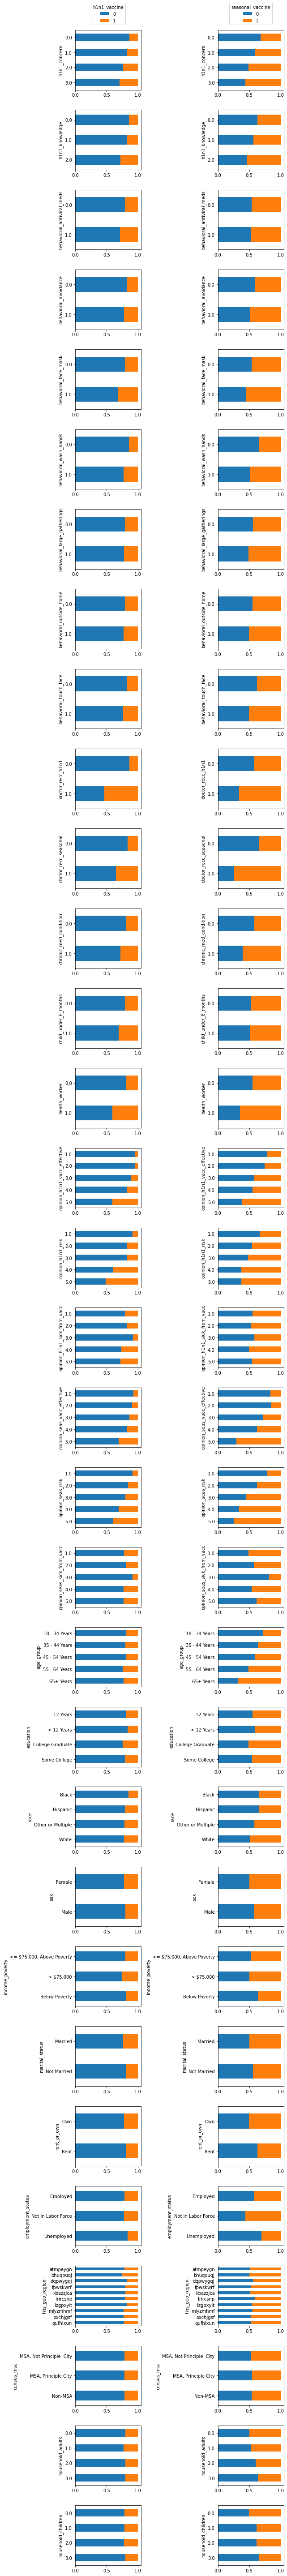

In [ ]:
fig, ax = plt.subplots(len(X_Y_train_col_drop.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1).columns),
                       2,
                       figsize=(9,len(X_Y_train_col_drop.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1).columns)*2.5)
)
for idx, col in enumerate(X_Y_train_col_drop.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1).columns):
  vaccination_rate_plot(col, 'h1n1_vaccine', X_Y_train_col_drop, ax=ax[idx, 0])
  vaccination_rate_plot(col, 'seasonal_vaccine', X_Y_train_col_drop, ax=ax[idx, 1])

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
    )
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
    )

fig.tight_layout()

**Graphical representation of features with response variables showed that overall, some features appeared correlated to positive H1N1 and seasonal vaccine responses. However, for model development, all features were used.**

#Model Development

In this section we are developing our predictive models and utilizes pipeline to streamline the pre-processing.

The main model evaluation metric used in this project is ROC AUC score, as specified by the DrivenData competition guidelines. 

In [ ]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from IPython.display import Image
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
likert = ['opinion_seas_sick_from_vacc',
          'opinion_seas_risk',
          'opinion_seas_vacc_effective',
          'opinion_h1n1_sick_from_vacc',
          'opinion_h1n1_vacc_effective',
          'opinion_h1n1_risk']

binary = ['doctor_recc_h1n1',
          'doctor_recc_seasonal',
          'chronic_med_condition',
          'child_under_6_months',
          'health_worker',
          'household_adults',
          'household_children',
          'behavioral_avoidance',
          'behavioral_touch_face',
          'h1n1_knowledge',
          'h1n1_concern',
          'behavioral_large_gatherings',
          'behavioral_outside_home',
          'behavioral_antiviral_meds',
          'behavioral_wash_hands',
          'behavioral_face_mask']

nominal = ['race',
           'sex',
           'hhs_geo_region',
           'census_msa',
           'rent_or_own',
           'employment_status',
           'marital_status']

###Data encoding and Preprocessing

Null vlaues in our dataset were filled in using a number of different methods

*   Likert data was imputed using a constant of 3 as that values was specified for responses of "Don't know"
*   Binary data (responses of 0 or 1) were imputed simply using the median response
*   Nominal data was not imputed, instead opting to create a new category for them as the 0 value via the handle_unkown keyword argument of the One-hot-encoder
*   Ordinal data was imputed for missing values as the 0 category then ordinal encoding was applied to the features

In [ ]:
#One-hot-encoding or ordinal/categorical encoding of features

set_config(display='diagram') #Allows for the display of pipelines as images

likert_preproc_steps = Pipeline([('likert_imputer',SimpleImputer(strategy='constant', fill_value=3))])
binary_preproc_steps = Pipeline([('binary_imputer',
                                  SimpleImputer(strategy='median'))])
nominal_preproc_steps = Pipeline([('nominal_encoder',
                                   OneHotEncoder(handle_unknown='ignore'))])
age_preproc_steps = Pipeline([('age_encoder',
                               OrdinalEncoder(categories=[['18 - 34 Years',
                                                    '35 - 44 Years',
                                                    '45 - 54 Years',
                                                    '55 - 64 Years',
                                                    '65+ Years']]))])
income_preproc_steps = Pipeline([('nan_imputer',
                                  SimpleImputer(strategy='constant',fill_value='unknown')),
                                 ('income_encoder',
                                  OrdinalEncoder(categories=[['unknown',
                                                             'Below Poverty',
                                                             '<= $75,000, Above Poverty',
                                                             '> $75,000']]))
                                 ])
edu_preproc_steps = Pipeline([('nan_imputer',
                               SimpleImputer(strategy='constant',fill_value='unknown')),
                              ('education_encoder',
                               OrdinalEncoder(categories=[['unknown',
                                                          '< 12 Years',
                                                          '12 Years',
                                                          'Some College',
                                                          'College Graduate']]))
                              ])

preprocessor = ColumnTransformer(transformers=
                                 [('likert',likert_preproc_steps,likert),                                                
                                  ('binary',binary_preproc_steps,binary),
                                  ('nominal',nominal_preproc_steps,nominal),
                                  ('age group',age_preproc_steps,['age_group']),
                                  ('income',income_preproc_steps,['income_poverty']),
                                  ('education',edu_preproc_steps,['education'])])

In [ ]:
preprocessor_pipeline = Pipeline([
                          ('preprocessor', preprocessor)
])

In [ ]:
preprocessor_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('likert',
                                                  Pipeline(steps=[('likert_imputer',
                                                                   SimpleImputer(fill_value=3,
                                                                                 strategy='constant'))]),
                                                  ['opinion_seas_sick_from_vacc',
                                                   'opinion_seas_risk',
                                                   'opinion_seas_vacc_effective',
                                                   'opinion_h1n1_sick_from_vacc',
                                                   'opinion_h1n1_vacc_effective',
                                                   'opinion_h1n1_risk']),
                                                 ('binary',
                                                  Pipeline(steps=[('...
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               'Below '
                                                                                               'Poverty',
                                                                                               '<= '
                                                                                               '$75,000, '
                                                                                               'Above '
                                                                                               'Poverty',
                                                                                               '> '
                                                                                               '$75,000']]))]),
                                                  ['income_poverty']),
                                                 ('education',
                                                  Pipeline(steps=[('nan_imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('education_encoder',
                                                                   OrdinalEncoder(categories=[['unknown',
                                                                                               '< '
                                                                                               '12 '
                                                                                               'Years',
                                                                                               '12 '
                                                                                               'Years',
                                                                                               'Some '
                                                                                               'College',
                                                                                               'College '
                                                                                               'Graduate']]))]),
                                                  ['education'])]))])

In [ ]:
#This function is for the purpose of extracting the feature names of the data aften pre-proccessing
#This was not made for this project and is instead borrowed from other work due to time constraints
#Efforts will be made in the future to remake it specifically for the needs of this project

import warnings
import sklearn

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [ ]:
X_train_preprocessed = pd.DataFrame(preprocessor_pipeline.fit_transform(X_train_col_drop))

feature_names = get_feature_names(preprocessor)

X_train_preprocessed.columns = feature_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Transformer likert_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Transformer binary_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Transformer age_encoder (type OrdinalEncoder) does not provide get_feature_names. Will return input column names if available
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Transformer nan_imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Transformer income_encoder (type OrdinalEncoder) does not provide get_feature_names. Will return input 

A train test split was built here for use in model evaluation. However the primary method used for determining the strengths of our models is cross validation. Both methods are applied however for comparison.

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    X_train_preprocessed,
    Y_train,
    test_size=0.25,
    shuffle=True,
    stratify=Y_train,
    random_state=42
)

### Logistic Regression Estimator

In [ ]:
from sklearn.linear_model import  LogisticRegression

lr_estimator = MultiOutputClassifier(
    estimator=LogisticRegression(solver='liblinear', penalty='l2', class_weight='balanced')          #using l2, Ridge regression
)

In [ ]:
lr_pipeline = Pipeline([
                          ('lr_estimator', lr_estimator)
])

In [ ]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('lr_estimator',
                 MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                    solver='liblinear')))])

In [ ]:
X_eval.head()

,likert__opinion_seas_sick_from_vacc,likert__opinion_seas_risk,likert__opinion_seas_vacc_effective,likert__opinion_h1n1_sick_from_vacc,likert__opinion_h1n1_vacc_effective,likert__opinion_h1n1_risk,binary__doctor_recc_h1n1,binary__doctor_recc_seasonal,binary__chronic_med_condition,binary__child_under_6_months,binary__health_worker,binary__household_adults,binary__household_children,binary__behavioral_avoidance,binary__behavioral_touch_face,binary__h1n1_knowledge,binary__h1n1_concern,binary__behavioral_large_gatherings,binary__behavioral_outside_home,binary__behavioral_antiviral_meds,binary__behavioral_wash_hands,binary__behavioral_face_mask,nominal_encoder__x0_Black,nominal_encoder__x0_Hispanic,nominal_encoder__x0_Other or Multiple,nominal_encoder__x0_White,nominal_encoder__x1_Female,nominal_encoder__x1_Male,nominal_encoder__x2_atmpeygn,nominal_encoder__x2_bhuqouqj,nominal_encoder__x2_dqpwygqj,nominal_encoder__x2_fpwskwrf,nominal_encoder__x2_kbazzjca,nominal_encoder__x2_lrircsnp,nominal_encoder__x2_lzgpxyit,nominal_encoder__x2_mlyzmhmf,nominal_encoder__x2_oxchjgsf,nominal_encoder__x2_qufhixun,"nominal_encoder__x3_MSA, Not Principle City","nominal_encoder__x3_MSA, Principle City",nominal_encoder__x3_Non-MSA,nominal_encoder__x4_Own,nominal_encoder__x4_Rent,nominal_encoder__x4_nan,nominal_encoder__x5_Employed,nominal_encoder__x5_Not in Labor Force,nominal_encoder__x5_Unemployed,nominal_encoder__x5_nan,nominal_encoder__x6_Married,nominal_encoder__x6_Not Married,nominal_encoder__x6_nan,age group__age_group,income__income_poverty,education__education
3780,1.0,4.0,5.0,1.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,4.0
6856,4.0,2.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0
10173,4.0,5.0,5.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0
7285,1.0,2.0,4.0,5.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,4.0
9874,2.0,4.0,4.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,1.0


In [ ]:
cv_preds = cross_val_predict(lr_pipeline, X_train_preprocessed, Y_train, method='predict_proba')
cv_preds

[array([[0.91247759, 0.08752241],
        [0.49335667, 0.50664333],
        [0.90176698, 0.09823302],
        ...,
        [0.42496193, 0.57503807],
        [0.92899627, 0.07100373],
        [0.52903546, 0.47096454]]), array([[0.92988574, 0.07011426],
        [0.87513602, 0.12486398],
        [0.90491433, 0.09508567],
        ...,
        [0.18711869, 0.81288131],
        [0.98199807, 0.01800193],
        [0.55074821, 0.44925179]])]

In [ ]:
cv_preds = pd.DataFrame(
    {
        "h1n1_vaccine": cv_preds[0][:,1],
        "seasonal_vaccine": cv_preds[1][:,1]
    },
    index = Y_train.index
)
print('y_preds.shape:', cv_preds.shape)
cv_preds.head()

y_preds.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0.087522,0.070114
1,0.506643,0.124864
2,0.098233,0.095086
3,0.228962,0.927047
4,0.133361,0.083832


In [ ]:
preds = lr_pipeline.predict_proba(X_eval)
preds

[array([[0.34270198, 0.65729802],
        [0.79110369, 0.20889631],
        [0.54053339, 0.45946661],
        ...,
        [0.38276778, 0.61723222],
        [0.03971033, 0.96028967],
        [0.30589145, 0.69410855]]), array([[0.13959697, 0.86040303],
        [0.66856925, 0.33143075],
        [0.32371556, 0.67628444],
        ...,
        [0.28388259, 0.71611741],
        [0.08437397, 0.91562603],
        [0.45487575, 0.54512425]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1]
    },
    index = y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,0.657298,0.860403
6856,0.208896,0.331431
10173,0.459467,0.676284
7285,0.055515,0.736531
9874,0.180102,0.754086


In [ ]:
def plot_roc(y_true, y_score, label_name, ax, color='blue'):
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  ax.plot(fpr,tpr, color = color)
  ax.plot([0,1], [0,1], color='grey', linestyle='--')
  ax.set_ylabel('TPR')
  ax.set_xlabel('FPR')
  ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
        )

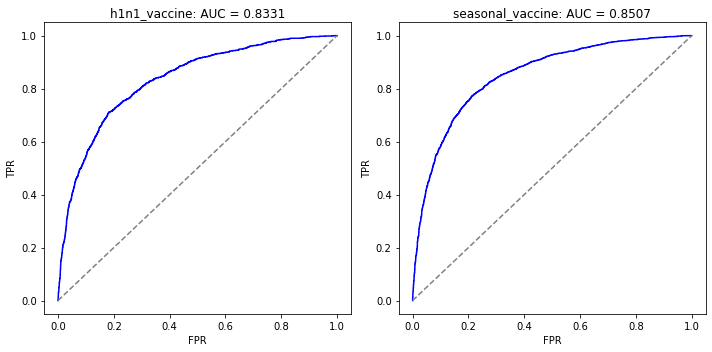

In [ ]:
#Train Test Split ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval,y_preds)

0.8418857521714269

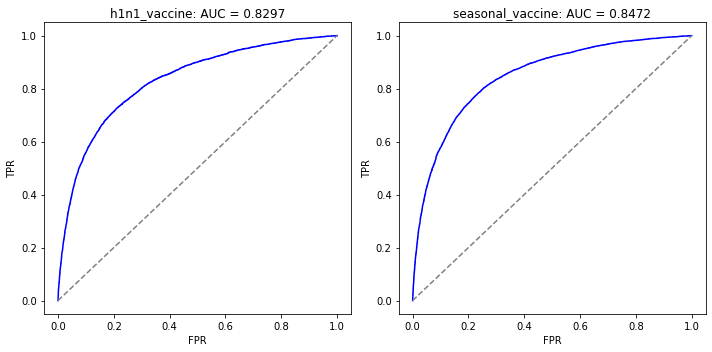

In [ ]:
#Cross Validation ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    Y_train['h1n1_vaccine'], 
    cv_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    Y_train['seasonal_vaccine'], 
    cv_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
auc_score = cross_val_score(lr_pipeline, X_train_preprocessed, Y_train, scoring='roc_auc')
print(np.mean(auc_score))

0.8384471906581442


**Logistic Regression ROC AUC Scores**

*   Train-Test Split: 0.842
*   Cross Validation (K = 5): 0.838

### Linear Discriminant Analysis Estimator

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_estimator = MultiOutputClassifier(
    estimator=LinearDiscriminantAnalysis()
)

In [ ]:
lda_pipeline = Pipeline([
                          ('lda_estimator', lda_estimator)
])

In [ ]:
lda_pipeline.fit(X_train, y_train)

Pipeline(steps=[('lda_estimator',
                 MultiOutputClassifier(estimator=LinearDiscriminantAnalysis()))])

In [ ]:
cv_preds = cross_val_predict(lda_pipeline, X_train_preprocessed, Y_train, method='predict_proba')
cv_preds

[array([[0.98023104, 0.01976896],
        [0.84600226, 0.15399774],
        [0.97951096, 0.02048904],
        ...,
        [0.78574251, 0.21425749],
        [0.98579705, 0.01420295],
        [0.87687501, 0.12312499]]), array([[0.94255159, 0.05744841],
        [0.90268474, 0.09731526],
        [0.93118738, 0.06881262],
        ...,
        [0.2170852 , 0.7829148 ],
        [0.9864764 , 0.0135236 ],
        [0.6201199 , 0.3798801 ]])]

In [ ]:
cv_preds = pd.DataFrame(
    {
        "h1n1_vaccine": cv_preds[0][:,1],
        "seasonal_vaccine": cv_preds[1][:,1]
    },
    index = Y_train.index
)
print('y_preds.shape:', cv_preds.shape)
cv_preds.head()

y_preds.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0.019769,0.057448
1,0.153998,0.097315
2,0.020489,0.068813
3,0.058192,0.931175
4,0.035743,0.063835


In [ ]:
preds = lda_pipeline.predict_proba(X_eval)
preds

[array([[0.71316663, 0.28683337],
        [0.95295735, 0.04704265],
        [0.8218584 , 0.1781416 ],
        ...,
        [0.58927234, 0.41072766],
        [0.0521612 , 0.9478388 ],
        [0.68289847, 0.31710153]]), array([[0.15832747, 0.84167253],
        [0.70792121, 0.29207879],
        [0.35354647, 0.64645353],
        ...,
        [0.31177688, 0.68822312],
        [0.08354501, 0.91645499],
        [0.52894369, 0.47105631]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1]
    },
    index = y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,0.286833,0.841673
6856,0.047043,0.292079
10173,0.178142,0.646454
7285,0.014664,0.738808
9874,0.061530,0.742309


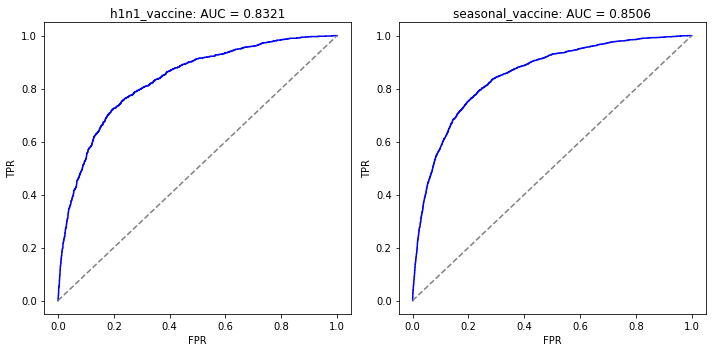

In [ ]:
#Train Test Split ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval,y_preds)

0.8413389947372285

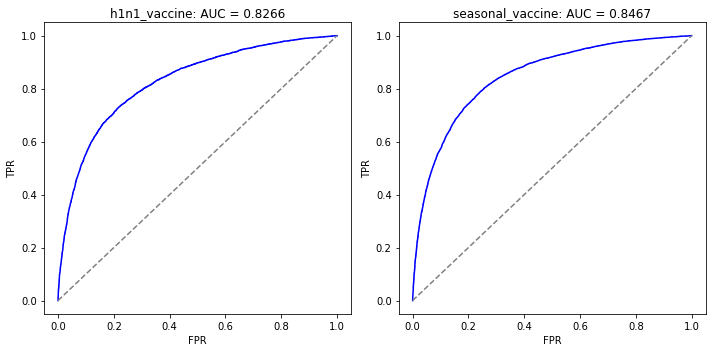

In [ ]:
#Cross Validation ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    Y_train['h1n1_vaccine'], 
    cv_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    Y_train['seasonal_vaccine'], 
    cv_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
auc_score = cross_val_score(lda_pipeline, X_train_preprocessed, Y_train, scoring='roc_auc')
print(np.mean(auc_score))

0.8366966411228596


**Linear Discriminant Analysis ROC AUC Scores**
*   Train-Test Split: 0.841
*   Cross Validation (K = 5): 0.837

### Quadratic Discriminant Analysis Estimator

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_estimator = MultiOutputClassifier(
    estimator=QuadraticDiscriminantAnalysis()
)

In [ ]:
qda_pipeline = Pipeline([
                          ('qda_estimator', qda_estimator)
])

In [ ]:
cv_preds = cross_val_predict(qda_pipeline, X_train_preprocessed, Y_train, method='predict_proba')
cv_preds

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

[array([[9.99995013e-01, 4.98699253e-06],
        [5.20682779e-02, 9.47931722e-01],
        [9.99999558e-01, 4.42405961e-07],
        ...,
        [1.00000000e+00, 2.10235515e-15],
        [3.97857038e-04, 9.99602143e-01],
        [9.99999999e-01, 5.54045378e-10]]),
 array([[9.99999993e-01, 6.54389241e-09],
        [9.99550924e-01, 4.49075628e-04],
        [9.72244287e-02, 9.02775571e-01],
        ...,
        [9.25722796e-05, 9.99907428e-01],
        [9.99999877e-01, 1.23029364e-07],
        [2.64265502e-02, 9.73573450e-01]])]

In [ ]:
cv_preds = pd.DataFrame(
    {
        "h1n1_vaccine": cv_preds[0][:,1],
        "seasonal_vaccine": cv_preds[1][:,1]
    },
    index = Y_train.index
)
print('y_preds.shape:', cv_preds.shape)
cv_preds.head()

y_preds.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,4.986993e-06,6.543892e-09
1,9.479317e-01,4.490756e-04
2,4.424060e-07,9.027756e-01
3,6.201320e-07,9.707044e-01
4,1.041522e-11,9.992783e-01


In [ ]:
qda_pipeline.fit(X_train, y_train)

preds = qda_pipeline.predict_proba(X_eval)
preds

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Pipeline(steps=[('qda_estimator',
                 MultiOutputClassifier(estimator=QuadraticDiscriminantAnalysis()))])

[array([[9.97181835e-01, 2.81816498e-03],
        [8.00350991e-01, 1.99649009e-01],
        [9.99870287e-01, 1.29712571e-04],
        ...,
        [9.96422465e-01, 3.57753543e-03],
        [2.73300392e-16, 1.00000000e+00],
        [9.99206467e-01, 7.93532513e-04]]),
 array([[1.02253334e-03, 9.98977467e-01],
        [9.92552047e-01, 7.44795311e-03],
        [3.90325644e-04, 9.99609674e-01],
        ...,
        [6.18493563e-11, 1.00000000e+00],
        [3.24734405e-30, 1.00000000e+00],
        [8.61560468e-01, 1.38439532e-01]])]

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1]
    },
    index = y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,2.818165e-03,9.989775e-01
6856,1.996490e-01,7.447953e-03
10173,1.297126e-04,9.996097e-01
7285,5.712661e-14,1.003360e-18
9874,7.985713e-04,1.000000e+00


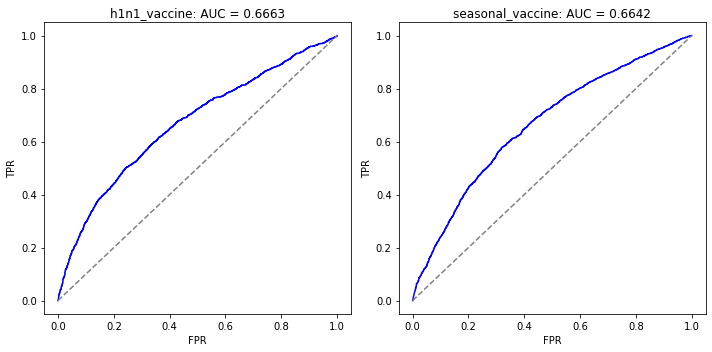

In [ ]:
#Train Test Split ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval,y_preds)

0.6652218815351182

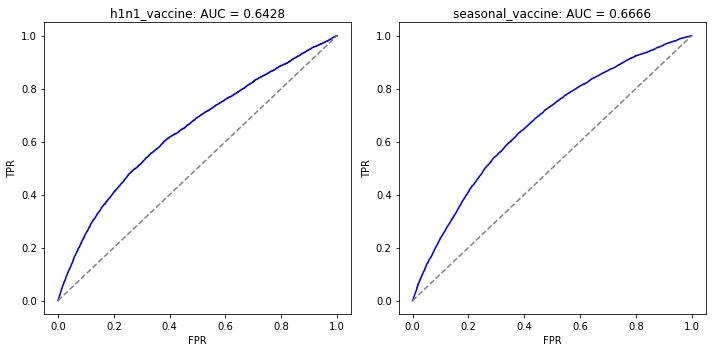

In [ ]:
#Cross Validation ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    Y_train['h1n1_vaccine'], 
    cv_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    Y_train['seasonal_vaccine'], 
    cv_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
auc_score = cross_val_score(qda_pipeline, X_train_preprocessed, Y_train, scoring='roc_auc')
print(np.mean(auc_score))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

0.6582264183755947


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**Quadratic Discriminant Analysis ROC AUC Scores**
*   Train-Test Split: 0.665
*   Cross Validation (K = 5): 0.658

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_estimator = DecisionTreeClassifier(min_samples_leaf=5, random_state = 0)           #set min # of observations in a leaf node = 5

In [ ]:
dt_pipeline = Pipeline([
                          ('dt_estimator', dt_estimator)
])

In [ ]:
dt_pipeline.fit(X_train, y_train)

preds = dt_pipeline.predict_proba(X_eval)
preds

Pipeline(steps=[('dt_estimator',
                 DecisionTreeClassifier(min_samples_leaf=5, random_state=0))])

[array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [1. , 0. ],
        [0. , 1. ],
        [0.5, 0.5]]), array([[0.        , 1.        ],
        [1.        , 0.        ],
        [0.        , 1.        ],
        ...,
        [0.42857143, 0.57142857],
        [0.        , 1.        ],
        [1.        , 0.        ]])]

In [ ]:
#plot_tree(clf_dt, filled=True, rounded=True, feature_names = feature_names)

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1]
    },
    index = y_eval.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (6677, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
3780,0.0,1.000
6856,0.0,0.000
10173,0.0,1.000
7285,0.0,1.000
9874,0.0,0.625


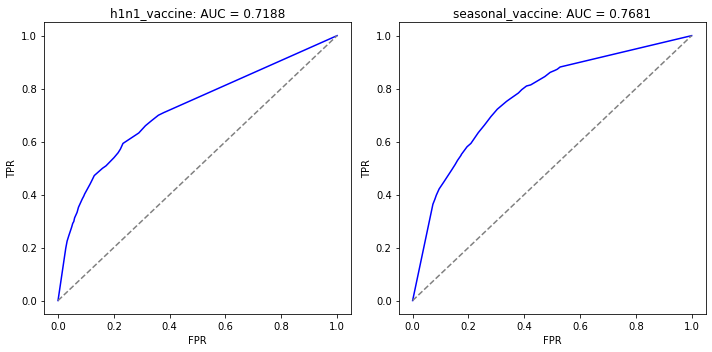

In [ ]:
#Train Test Split ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_eval,y_preds)

0.7434217844033084

**Cost Complexity Prunning for Decision Tree**

Due to the computentially intensive nature of cost complexity pruning, we leave it commented out for the sake of ease of use for those running this workbook. 

However all code for this section is perfectly functional and can be re-enabled if desired. Do not that the total time for this process is approximately 1.5 hours and may not work within Google Colab.

ROC AUC scores for this process will be provided at the end of the section.

In [ ]:
#NOTE: this cell takes approximately 1.5 hours to run, this may not work on colab 

#set_config(display='none')

#path = dt_estimator.cost_complexity_pruning_path(X_train, y_train) #determine values of alpha
#ccp_alphas = path.ccp_alphas #extract different alphas
#ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha

#len(ccp_alphas)

#alpha_loop_values = [] #hold cross validated ROC AUC Scores

#for ccp_alpha in ccp_alphas:
#    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
#    scores = cross_val_score(clf_dt, X_train, y_train, cv=5, scoring='roc_auc')
#    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

#alpha_results = pd.DataFrame(alpha_loop_values,
#                             columns=['alpha', 'mean_auc','std'])

#alpha_results.plot(x='alpha',
#                   y='mean_auc',
#                   yerr='std',
#                   marker='o',
#                   linestyle='--',
#                   xlabel='Alpha',
#                   ylabel='Mean AUC')

In [ ]:
#alpha_results.iloc[alpha_results['mean_auc'].idxmax()]

In [ ]:
# ideal_alpha = alpha_results['alpha'].iloc[alpha_results['mean_auc'].idxmax()]

In [ ]:
# dt_estimator = DecisionTreeClassifier(random_state = 0, ccp_alpha= ideal_alpha)

# dt_pipeline = Pipeline([
#                           ('dt_estimator', dt_estimator)
# ])

# dt_pipeline.fit(X_train, y_train)

# preds = dt_pipeline.predict_proba(X_eval)

In [ ]:
# y_preds = pd.DataFrame(
#     {
#         "h1n1_vaccine": preds[0][:,1],
#         "seasonal_vaccine": preds[1][:,1]
#     },
#     index = y_eval.index
# )
# print('y_preds.shape:', y_preds.shape)
# y_preds.head()

In [ ]:
# cv_preds = cross_val_predict(dt_pipeline, X_train_preprocessed, Y_train, method='predict_proba')
# cv_preds

In [ ]:
# cv_preds = pd.DataFrame(
#     {
#         "h1n1_vaccine": cv_preds[0][:,1],
#         "seasonal_vaccine": cv_preds[1][:,1]
#     },
#     index = Y_train.index
# )
# print('y_preds.shape:', cv_preds.shape)
# cv_preds.head()

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot_roc(
#     y_eval['h1n1_vaccine'], 
#     y_preds['h1n1_vaccine'], 
#     'h1n1_vaccine',
#     ax=ax[0]
# )
# plot_roc(
#     y_eval['seasonal_vaccine'], 
#     y_preds['seasonal_vaccine'], 
#     'seasonal_vaccine',
#     ax=ax[1]
# )
# fig.tight_layout()

In [ ]:
# roc_auc_score(y_eval,y_preds)

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot_roc(
#     Y_train['h1n1_vaccine'], 
#     cv_preds['h1n1_vaccine'], 
#     'h1n1_vaccine',
#     ax=ax[0]
# )
# plot_roc(
#     Y_train['seasonal_vaccine'], 
#     cv_preds['seasonal_vaccine'], 
#     'seasonal_vaccine',
#     ax=ax[1]
# )
# fig.tight_layout()

In [ ]:
# auc_score = cross_val_score(dt_pipeline, X_train_preprocessed, Y_train, scoring='roc_auc')
# print(np.mean(auc_score))

**Decision Tree Pruned ROC AUC Scores**

*   Cross Validation (K = 5): 0.816



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt', random_state = 1)   #consider the sqrt of total number of features when looking for the best split

rf_pipeline = Pipeline([
                          ('rf_estimator', rf)
])

In [ ]:
cv_preds = cross_val_predict(rf_pipeline, X_train_preprocessed, Y_train, method='predict_proba')
cv_preds

[array([[0.98, 0.02],
        [0.74, 0.26],
        [0.94, 0.06],
        ...,
        [0.76, 0.24],
        [0.98, 0.02],
        [0.8 , 0.2 ]]), array([[0.93, 0.07],
        [0.86, 0.14],
        [0.91, 0.09],
        ...,
        [0.25, 0.75],
        [0.98, 0.02],
        [0.57, 0.43]])]

In [ ]:
cv_preds = pd.DataFrame(
    {
        "h1n1_vaccine": cv_preds[0][:,1],
        "seasonal_vaccine": cv_preds[1][:,1]
    },
    index = Y_train.index
)
print('y_preds.shape:', cv_preds.shape)
cv_preds.head()

y_preds.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0.02,0.07
1,0.26,0.14
2,0.06,0.09
3,0.13,0.87
4,0.05,0.11


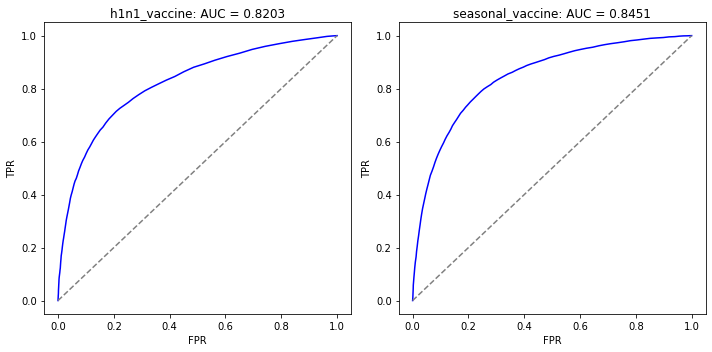

In [ ]:
#Cross Validation ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    Y_train['h1n1_vaccine'], 
    cv_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    Y_train['seasonal_vaccine'], 
    cv_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
auc_score = cross_val_score(rf_pipeline, X_train_preprocessed, Y_train, scoring='roc_auc')
print(np.mean(auc_score))

0.8327386110043093


**Random Forest ROC AUC Scores**

*   Cross Validation (K = 5): 0.816


# Model Optimization - Logistic Regression

Tuning Parameters explored in this section


*   Lambda value (C) for L2 regularization

Solvers were attempted previously, however due to data convergence errors, they were removed.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'lr_estimator__estimator__C':[100, 10, 1, 0.1, 0.01],
             'lr_estimator__estimator__penalty':['l2']
             }

In [ ]:
lr_pipe_optimized = GridSearchCV(lr_pipeline,
                                param_grid,
                                scoring='roc_auc',
                                cv=5)

In [ ]:
cv_preds = cross_val_predict(lr_pipe_optimized, X_train_preprocessed, Y_train, method='predict_proba')
cv_preds

[array([[0.91324799, 0.08675201],
        [0.49337529, 0.50662471],
        [0.9021776 , 0.0978224 ],
        ...,
        [0.42496193, 0.57503807],
        [0.92899627, 0.07100373],
        [0.52903546, 0.47096454]]), array([[0.9306253 , 0.0693747 ],
        [0.87532918, 0.12467082],
        [0.90530207, 0.09469793],
        ...,
        [0.18711869, 0.81288131],
        [0.98199807, 0.01800193],
        [0.55074821, 0.44925179]])]

In [ ]:
cv_preds = pd.DataFrame(
    {
        "h1n1_vaccine": cv_preds[0][:,1],
        "seasonal_vaccine": cv_preds[1][:,1]
    },
    index = Y_train.index
)
print('y_preds.shape:', cv_preds.shape)
cv_preds.head()

y_preds.shape: (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0.086752,0.069375
1,0.506625,0.124671
2,0.097822,0.094698
3,0.227878,0.927348
4,0.132711,0.083383


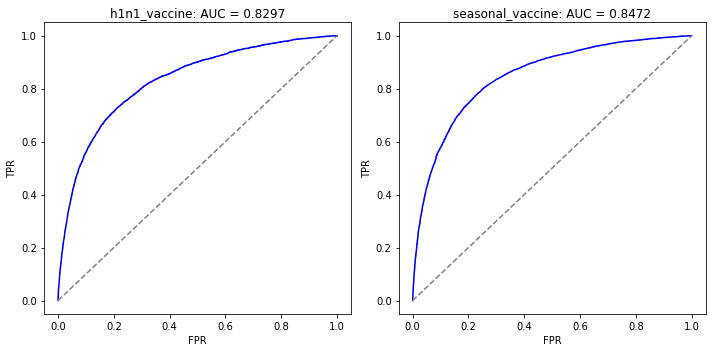

In [ ]:
#Cross Validation ROC AUC

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(
    Y_train['h1n1_vaccine'], 
    cv_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    Y_train['seasonal_vaccine'], 
    cv_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
auc_score = cross_val_score(lr_pipe_optimized, X_train_preprocessed, Y_train, scoring='roc_auc')
print(np.mean(auc_score))

0.8384492662589546


**Logistic Regression with Grid Search ROC AUC Scores**

*   Train-Test Split: 0.842
*   Cross Validation (K = 5): 0.838

# Final Pipeline and Predictions

In [ ]:
X_train = pd.read_csv(X_train_url, index_col='respondent_id')
X_test = pd.read_csv(X_test_url, index_col='respondent_id')
Y_train = pd.read_csv(Y_train_url, index_col='respondent_id')

In [ ]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lr_estimator', lr_estimator)
])

full_pipe_optimized = GridSearchCV(full_pipeline,
                                param_grid,
                                scoring='roc_auc',
                                cv=5)

full_pipe_optimized.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('likert',
                                                                         Pipeline(steps=[('likert_imputer',
                                                                                          SimpleImputer(fill_value=3,
                                                                                                        strategy='constant'))]),
                                                                         ['opinion_seas_sick_from_vacc',
                                                                          'opinion_seas_risk',
                                                                          'opinion_seas_vacc_effective',
                                                                          'opinion_h1n1_sick_from_vacc',
                                                                          'opinion_h1n1_vacc_effective',
                                                                          'opinion_h1n1_risk']),...
                                                                                          OrdinalEncoder(categories=[['unknown',
                                                                                                                      '< '
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      '12 '
                                                                                                                      'Years',
                                                                                                                      'Some '
                                                                                                                      'College',
                                                                                                                      'College '
                                                                                                                      'Graduate']]))]),
                                                                         ['education'])])),
                                       ('lr_estimator',
                                        MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                                           solver='liblinear')))]),
             param_grid={'lr_estimator__estimator__C': [100, 10, 1, 0.1, 0.01],
                         'lr_estimator__estimator__penalty': ['l2']},
             scoring='roc_auc')

In [ ]:
lr_pipe = full_pipe_optimized.best_estimator_.named_steps['lr_estimator']

coefficients = {'h1n1vaccine coefficients':lr_pipe.estimators_[0].coef_.tolist()[0],
                'seasonal vaccine coefficients':lr_pipe.estimators_[1].coef_.tolist()[0]}

df_coef = pd.DataFrame(data = coefficients, index=X_train_preprocessed.columns)
df_coef

,h1n1vaccine coefficients,seasonal vaccine coefficients
likert__opinion_seas_sick_from_vacc,-0.084588,-0.200540
likert__opinion_seas_risk,0.160102,0.533925
likert__opinion_seas_vacc_effective,0.068022,0.547061
likert__opinion_h1n1_sick_from_vacc,-0.007501,-0.057027
likert__opinion_h1n1_vacc_effective,0.580939,0.012521
likert__opinion_h1n1_risk,0.364761,0.036538
binary__doctor_recc_h1n1,2.078760,-0.257909
binary__doctor_recc_seasonal,-0.511671,1.454465
binary__chronic_med_condition,0.091644,0.217157
binary__child_under_6_months,0.233906,0.093744


<BarContainer object of 54 artists>

Text(0.5, 1.0, 'h1n1 vaccine coefficients')

<BarContainer object of 54 artists>

Text(0.5, 1.0, 'seasonal vaccine coefficients')

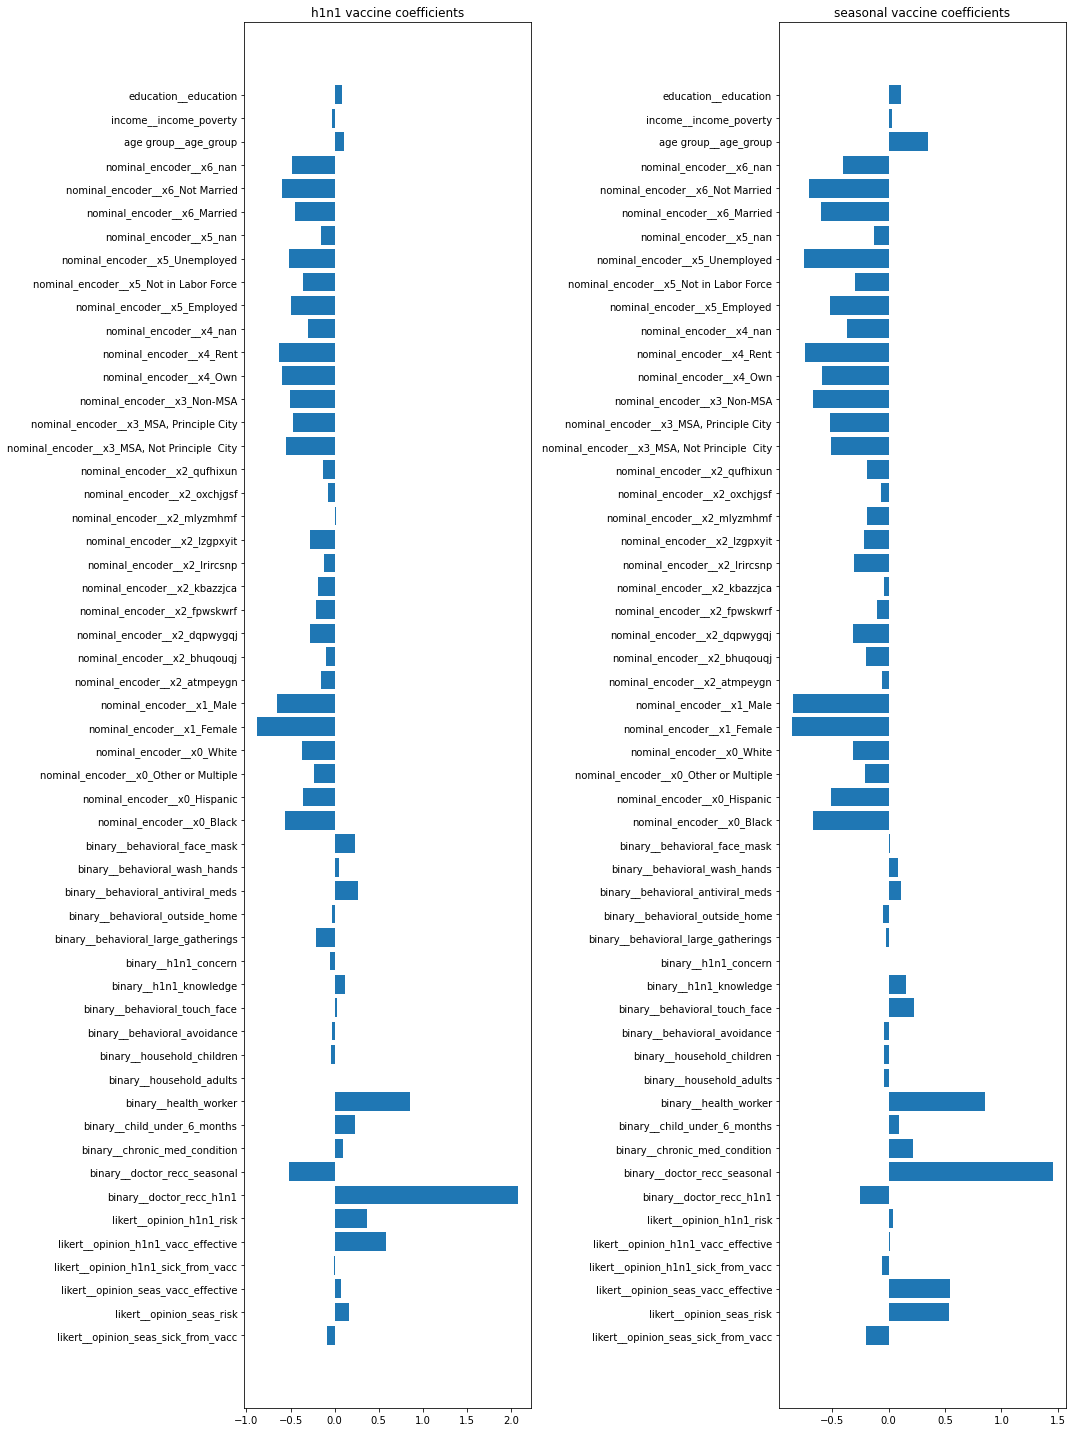

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].barh(df_coef['h1n1vaccine coefficients'].index,df_coef['h1n1vaccine coefficients'])
ax[0].set_title('h1n1 vaccine coefficients')

ax[1].barh(df_coef['seasonal vaccine coefficients'].index, df_coef['seasonal vaccine coefficients'])
ax[1].set_title('seasonal vaccine coefficients')

plt.tight_layout()
plt.show()

<Figure size 1080x1440 with 0 Axes>

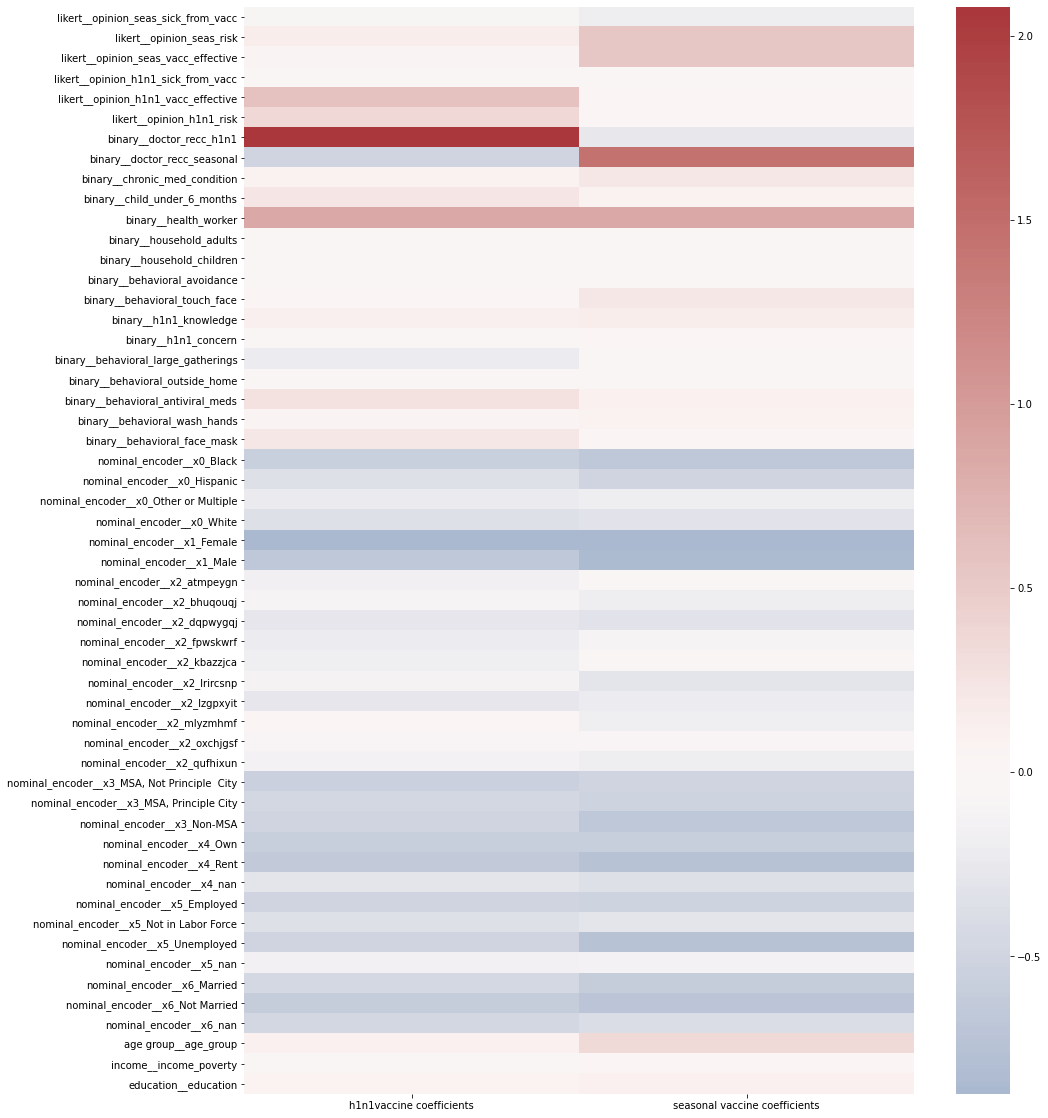

In [ ]:
plt.figure(figsize=(15,20))

sns.heatmap(df_coef, center= 0, cmap="vlag")

In [ ]:
test_probs = full_pipe_optimized.predict_proba(X_test)
test_probs

[array([[0.74259197, 0.25740803],
        [0.8407017 , 0.1592983 ],
        [0.26373607, 0.73626393],
        ...,
        [0.65575286, 0.34424714],
        [0.79069313, 0.20930687],
        [0.15758027, 0.84241973]]), array([[0.76954793, 0.23045207],
        [0.94639584, 0.05360416],
        [0.32392862, 0.67607138],
        ...,
        [0.76123073, 0.23876927],
        [0.52564894, 0.47435106],
        [0.45823977, 0.54176023]])]

In [ ]:
submission_url = "https://raw.githubusercontent.com/zmarkofsky/DataDriven_Predicting_H1N1/main/submission_format.csv"

submission_df = pd.read_csv(submission_url, index_col='respondent_id')
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [ ]:
submission_df

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
...,...,...
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7


In [ ]:
np.testing.assert_array_equal(X_test.index.values, submission_df.index.values)

submission_df["h1n1_vaccine"] = test_probs[0][:, 1]
submission_df["seasonal_vaccine"] = test_probs[1][:, 1]

submission_df.head(10)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.257408,0.230452
26708,0.159298,0.053604
26709,0.736264,0.676071
26710,0.765508,0.878442
26711,0.486077,0.459364
26712,0.746435,0.926593
26713,0.685484,0.572792
26714,0.358664,0.265608
26715,0.135886,0.208247


In [ ]:
submission_df.to_csv('my_submission.csv', index=True)